In [ ]:
# Edmunds Car Reviews NLP Analysis with NLTK

# It loads the Edmunds dataset from Kaggle, processes it using NLTK, and performs various NLP tasks.

# Step 1: Install required libraries
!pip install nltk kaggle --quiet

# Step 2: Upload kaggle.json for API access if not present
import os
if not os.path.exists('/root/.kaggle/kaggle.json'):
    from google.colab import files
    print("Please upload your 'kaggle.json' file containing Kaggle API credentials.")
    uploaded = files.upload()
    os.makedirs('/root/.kaggle', exist_ok=True)
    with open('/root/.kaggle/kaggle.json', 'wb') as f:
        f.write(uploaded['kaggle.json'])
    os.chmod('/root/.kaggle/kaggle.json', 600)




In [ ]:
# Step 3: Download the dataset using Kaggle API
!kaggle datasets download -d sourabhsabharwal/sentiment-analysis-car-reviews --unzip

# Step 4: Import libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.text import Text

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')



Dataset URL: https://www.kaggle.com/datasets/sourabhsabharwal/sentiment-analysis-car-reviews
License(s): unknown
  0% 0.00/43.8k [00:00<?, ?B/s]
100% 43.8k/43.8k [00:00<00:00, 121MB/s]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Step 5: Load the dataset
try:
    df = pd.read_csv('Car_Reviews_Database.csv', encoding='utf-8')
    print("Dataset loaded successfully with utf-8 encoding!")
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying with latin-1 encoding...")
    df = pd.read_csv('Car_Reviews_Database.csv', encoding='latin-1')
    print("Dataset loaded successfully with latin-1 encoding!")

# Show first few rows
print(df.head())

# For simplicity, we will use the 'Review' column
reviews = df['Review'].dropna().astype(str).tolist()

# Combine all reviews into one text
all_text = " ".join(reviews)

UTF-8 decoding failed, trying with latin-1 encoding...
Dataset loaded successfully with latin-1 encoding!
   Year Model                                              Review
0  2009  Honda  Although arguably the first-generation Insight...
1  2009  Honda  2009 Honda Accord EX-L 4  : This car is very c...
2  2010  Honda  I have owed and driven Honda products for 20 y...
3  2010  Honda  Honda Accord Euro L : The seats are average, b...
4  2011  Honda   Honda HR-V: Continuous variable transmission ...


In [ ]:
# Step 6: Tokenizing
import nltk

# Download punkt_tab if not already present
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab')


word_tokens = word_tokenize(all_text)
sent_tokens = sent_tokenize(all_text)
print("Number of word tokens:", len(word_tokens))
print("Number of sentence tokens:", len(sent_tokens))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Number of word tokens: 23883
Number of sentence tokens: 1298


In [ ]:
# Step 7: Filtering Stop Words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalpha()]
print("Number of filtered words:", len(filtered_words))



Number of filtered words: 10712


In [ ]:
# Step 8: Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_words]



In [ ]:
# Step 9: POS Tagging
import nltk
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng/')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(filtered_words)
print("POS tags sample:", pos_tags[:10])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


POS tags sample: [('Although', 'IN'), ('arguably', 'RB'), ('hybrid', 'JJ'), ('powertrain', 'NN'), ('unique', 'JJ'), ('styling', 'VBG'), ('made', 'VBN'), ('ahead', 'RB'), ('time', 'NN'), ('rebirth', 'JJ')]


In [ ]:
# Step 10: Lemmatizing
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized words sample:", lemmatized_words[:10])



Lemmatized words sample: ['Although', 'arguably', 'hybrid', 'powertrain', 'unique', 'styling', 'made', 'ahead', 'time', 'rebirth']


In [ ]:
# Step 11: Chunking
chunk_grammar = """
    NP: {<DT>?<JJ>*<NN>}
"""
chunk_parser = nltk.RegexpParser(chunk_grammar)
chunks = chunk_parser.parse(pos_tags)
print("Chunking sample:", chunks)



Chunking sample: (S
  Although/IN
  arguably/RB
  (NP hybrid/JJ powertrain/NN)
  unique/JJ
  styling/VBG
  made/VBN
  ahead/RB
  (NP time/NN)
  rebirth/JJ
  Insight/NNP
  (NP model/NN)
  designed/VBN
  much/RB
  greater/JJR
  (NP global/JJ appeal/NN)
  Honda/NNP
  Accord/NNP
  (NP car/NN)
  (NP comfortable/JJ sporty/NN)
  cylinders/NNS
  best/JJS
  (NP transmission/NN)
  (NP car/NN)
  years/NNS
  cars/NNS
  owed/VBD
  driven/JJ
  Honda/NNP
  products/NNS
  years/NNS
  purchased/VBD
  (NP vehicle/NN)
  March/NNP
  true/JJ
  Honda/NNP
  fanatic/JJ
  ending/VBG
  (NP piece/JJ junk/NN)
  never/RB
  (NP business/NN)
  Honda/NNP
  automobiles/VBZ
  products/NNS
  seats/NNS
  extremely/RB
  uncomfortable/JJ
  becoming/VBG
  apparent/JJ
  minutes/NNS
  worst/VBP
  (NP thing/NN)
  (NP headrest/NN)
  leans/VBZ
  far/RB
  (NP forward/JJ head/NN)
  (NP bent/NN)
  shoulders/NNS
  forced/VBD
  (NP seat/JJ try/NN)
  driving/VBG
  like/IN
  minutes/NNS
  (NP time/NN)
  forced/VBN
  either/RB
  remove/

In [ ]:
# Step 12: Chinking
chink_grammar = """
    NP: {<DT>?<JJ>*<NN>}  # Chunk sequences of DT, JJ, NN
        }<VB.*|IN>{        # Except if followed by VB* or IN
"""
chink_parser = nltk.RegexpParser(chink_grammar)
chinked = chink_parser.parse(pos_tags)
print("Chinking sample:", chinked)



Chinking sample: (S
  Although/IN
  arguably/RB
  (NP hybrid/JJ powertrain/NN)
  unique/JJ
  styling/VBG
  made/VBN
  ahead/RB
  (NP time/NN)
  rebirth/JJ
  Insight/NNP
  (NP model/NN)
  designed/VBN
  much/RB
  greater/JJR
  (NP global/JJ appeal/NN)
  Honda/NNP
  Accord/NNP
  (NP car/NN)
  (NP comfortable/JJ sporty/NN)
  cylinders/NNS
  best/JJS
  (NP transmission/NN)
  (NP car/NN)
  years/NNS
  cars/NNS
  owed/VBD
  driven/JJ
  Honda/NNP
  products/NNS
  years/NNS
  purchased/VBD
  (NP vehicle/NN)
  March/NNP
  true/JJ
  Honda/NNP
  fanatic/JJ
  ending/VBG
  (NP piece/JJ junk/NN)
  never/RB
  (NP business/NN)
  Honda/NNP
  automobiles/VBZ
  products/NNS
  seats/NNS
  extremely/RB
  uncomfortable/JJ
  becoming/VBG
  apparent/JJ
  minutes/NNS
  worst/VBP
  (NP thing/NN)
  (NP headrest/NN)
  leans/VBZ
  far/RB
  (NP forward/JJ head/NN)
  (NP bent/NN)
  shoulders/NNS
  forced/VBD
  (NP seat/JJ try/NN)
  driving/VBG
  like/IN
  minutes/NNS
  (NP time/NN)
  forced/VBN
  either/RB
  remove/

In [ ]:
# Step 13: Named Entity Recognition (NER)
import nltk
try:
    nltk.data.find('chunkers/maxent_ne_chunker_tab/english_ace_multiclass/')
except LookupError:
    nltk.download('maxent_ne_chunker_tab')

ner_tree = nltk.ne_chunk(pos_tags)
print("Named Entities:")
nltk.tree.Tree.pretty_print(ner_tree)

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


Named Entities:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:

# Step 14: Getting Text to Analyze
nltk_text = Text(filtered_words)



In [ ]:
# Step 15: Using a Concordance
print("Concordance for 'good':")
nltk_text.concordance('good')



Concordance for 'good':
Displaying 25 of 65 matches:
ever let major problems Road holding good old vehicle gearbox used need mainta
d vehicle gearbox used need maintain good average speeds hilly country never w
c LS saloon first Hybrid CVT gearbox good conventional automatic certainly lot
ior car nice comfortable driver seat good lumbar lateral support plenty legroo
upport plenty legroom steering wheel good range height reach quality cabin mat
way Overall except visibility issues good city car fit plenty junk engine exac
uring trim lower fuel economy rating Good Great Elantra Still Squarely Value S
mote trunk release nice sound system good looking interior spacious aux outlet
tles coming suspension Nice interior good quality mechanically still needs tod
ndai Builds Warm Hatch Elantra sedan good compact particularly sporty GTis per
ments well laid simple use intuitive good quality buttons feel pleasant interi
 low anyone head hitting roof handle Good legroom rear easy entry competent So

<Figure size 1000x600 with 0 Axes>

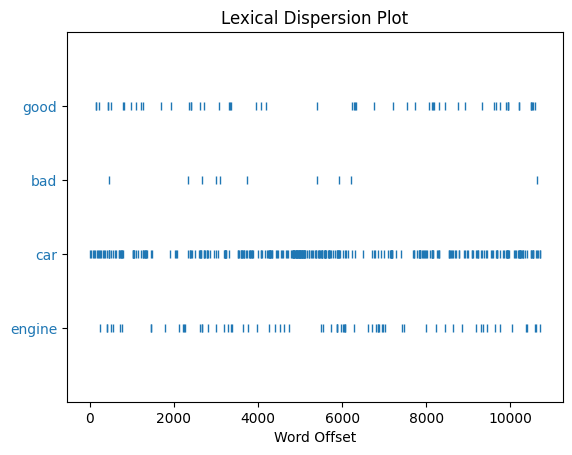

In [ ]:
# Step 16: Dispersion Plot
plt.figure(figsize=(10,6))
nltk_text.dispersion_plot(['good', 'bad', 'car', 'engine'])



Most common 10 words: [('car', 313), ('like', 71), ('engine', 71), ('drive', 71), ('interior', 64), ('driving', 62), ('handling', 61), ('good', 58), ('seats', 57), ('model', 52)]
NLP analysis completed!


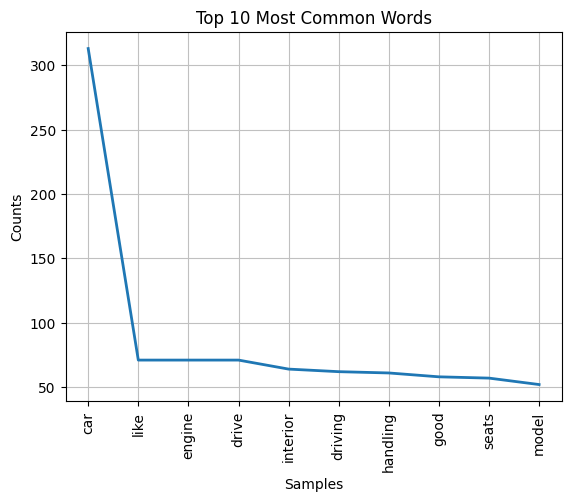

In [ ]:
# Step 17: Frequency Distribution
fdist = FreqDist(filtered_words)
print("Most common 10 words:", fdist.most_common(10))

# Plotting the frequency distribution
fdist.plot(10, title='Top 10 Most Common Words')

print("NLP analysis completed!")


Most common 10 lemmatized words: [('hospital', 328), ('good', 261), ('staff', 231), ('doctor', 222), ('service', 187), ('patient', 172), ('experience', 142), ('Dr', 123), ('treatment', 114), ('care', 113)]

Most common 10 POS tags: [('NN', 3278), ('JJ', 1940), ('NNP', 1299), ('NNS', 916), ('RB', 723), ('VBG', 479), ('VBD', 442), ('VBP', 369), ('VBZ', 270), ('IN', 225)]

Most common 10 Named Entities: [('Hospital', 34), ('Good', 22), ('Thank', 12), ('Nurses', 11), ('ICU', 9), ('Thanks', 8), ('Great', 8), ('Food', 7), ('Manipal', 7), ('Doctors', 6)]

Additional visualizations generated!


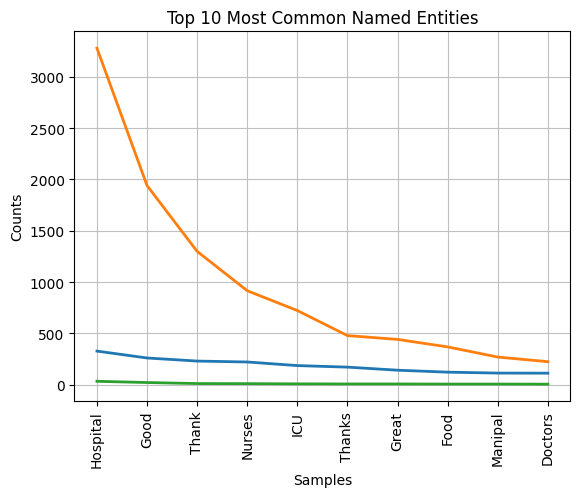

In [ ]:
# Step 18: Frequency Distribution of Lemmatized Words
fdist_lemmatized = FreqDist(lemmatized_words)
print("\nMost common 10 lemmatized words:", fdist_lemmatized.most_common(10))
fdist_lemmatized.plot(10, title='Top 10 Most Common Lemmatized Words')

# Step 19: Frequency Distribution of POS Tags
pos_tags_only = [tag for (word, tag) in pos_tags]
fdist_pos = FreqDist(pos_tags_only)
print("\nMost common 10 POS tags:", fdist_pos.most_common(10))
fdist_pos.plot(10, title='Top 10 Most Common POS Tags')

# Step 20: Frequency Distribution of Named Entities
named_entities = []
for chunk in ner_tree:
    if hasattr(chunk, 'label'):
        named_entities.append(' '.join(c[0] for c in chunk))

fdist_named_entities = FreqDist(named_entities)
print("\nMost common 10 Named Entities:", fdist_named_entities.most_common(10))
fdist_named_entities.plot(10, title='Top 10 Most Common Named Entities')

print("\nAdditional visualizations generated!")

In [ ]:
# Install required libraries
!pip install transformers --quiet

# Import libraries
from transformers import pipeline
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('Car_Reviews_Database.csv', encoding='utf-8')
    print("Dataset loaded successfully with utf-8 encoding!")
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying with latin-1 encoding...")
    df = pd.read_csv('Car_Reviews_Database.csv', encoding='latin-1')
    print("Dataset loaded successfully with latin-1 encoding!")

# Check available columns
print("Available columns:", df.columns)

# Assuming 'Review' column exists
reviews = df['Review'].dropna().astype(str).tolist()

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Example usage with one review
example_review = "The car's performance is outstanding and very smooth to drive."
sentiment = sentiment_pipeline(example_review)[0]
print("Review:", example_review)
print("Sentiment:", sentiment)

# Apply to multiple reviews (first 10 as example)
for rev in reviews[:10]:
    result = sentiment_pipeline(rev)[0]
    print(f"Review: {rev}\nSentiment: {result}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


UTF-8 decoding failed, trying with latin-1 encoding...
Dataset loaded successfully with latin-1 encoding!
Available columns: Index(['Year', 'Model ', 'Review'], dtype='object')


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Review: The car's performance is outstanding and very smooth to drive.
Sentiment: {'label': 'POSITIVE', 'score': 0.999870777130127}
Review: Although arguably the first-generation Insights hybrid powertrain and unique styling made it ahead of its time, the rebirth of the Insight with this second-generation model is designed for much greater global appeal
Sentiment: {'label': 'POSITIVE', 'score': 0.9996449947357178}

Review: 2009 Honda Accord EX-L 4  : This car is very comfortable & sporty for 4 cylinders! It has the best transmission of any car I've had for 43 years, which were about 42 cars!
Sentiment: {'label': 'POSITIVE', 'score': 0.9997023940086365}

Review: I have owed and driven Honda products for 20 years. Until I purchased this vehicle on March 27, 2010 I was a true Honda fanatic. After ending up with this piece of junk I will never do business with Honda again. Not just their automobiles, but all of their products.  The seats are extremely uncomfortable, becoming very apparent